In [183]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [184]:
application_df.shape

(34299, 12)

In [185]:
application_df=application_df.drop(['EIN','NAME'],axis=1)

application_types_to_replace=['T9','T13','T12','T2','T14','T25','T15','T29','T17']

for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")
    
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [186]:
application_df=application_df.groupby('CLASSIFICATION').filter(lambda x: len(x) > 1)
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C4100        6
C1720        6
C2400        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C1234        2
C1267        2
C1256        2
C3200        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [187]:
classification_dict=application_df['CLASSIFICATION'].value_counts().to_dict()

classifications_to_replace=[]

for key, value in classification_dict.items():
    if value <500:
        classifications_to_replace.append(key)
        
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe

for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1458
C7000      777
Name: CLASSIFICATION, dtype: int64

In [188]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [189]:
application_df['STATUS'].value_counts()

1    34268
0        5
Name: STATUS, dtype: int64

In [190]:
# dropping rows with active status 0
application_df=application_df.loc[application_df['STATUS']==1,:]

<AxesSubplot:>

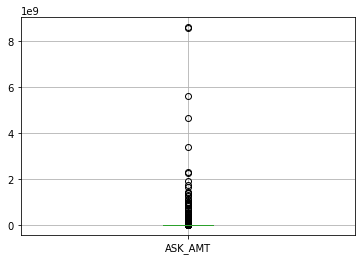

In [191]:
# checking for outliers in cols

import matplotlib.pyplot as plt
application_df.boxplot(column=['ASK_AMT'])

In [192]:
max_ASK_AMT=application_df['ASK_AMT'].max()
min_ASK_AMT=application_df['ASK_AMT'].min()

print (f'max_ASK_AMT : {max_ASK_AMT}')
print (f'min_ASK_AMT : {min_ASK_AMT}')


max_ASK_AMT : 8597806340
min_ASK_AMT : 5000


In [193]:
import numpy as np
quartiles=np.quantile(application_df['ASK_AMT'],[.25,.75])
iqr=quartiles[1]-quartiles[0]
lower_band=quartiles[0]-1.5*iqr
upper_band=quartiles[1]+ 1.5*iqr

#dropping outliers
filt=(application_df['ASK_AMT']<=upper_band)| (application_df['ASK_AMT']>=lower_band)
application_df=application_df.loc[filt,:]

In [194]:
application_df.shape

(34268, 10)

In [195]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df_encoded =pd.get_dummies(application_df, drop_first=True)
application_df_encoded.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Other', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

In [196]:
application_df_encoded.shape

(34268, 38)

In [197]:
X=application_df_encoded.drop(['IS_SUCCESSFUL'],axis=1)
y=application_df_encoded['IS_SUCCESSFUL']

In [198]:
X.shape

(34268, 37)

In [199]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [200]:
# Create a StandardScaler instances
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Attempt 1 for optimization selecting different hyperparameters

In [201]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=74,activation='relu',input_dim=37))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=37,activation='relu'))
nn.add(tf.keras.layers.Dense(units=18,activation='tanh'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 74)                2812      
_________________________________________________________________
dense_7 (Dense)              (None, 37)                2775      
_________________________________________________________________
dense_8 (Dense)              (None, 18)                684       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 19        
Total params: 6,290
Trainable params: 6,290
Non-trainable params: 0
_________________________________________________________________


In [202]:
nn.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

# Train the model
#  YOUR CODE GOES HERE
fit_model=nn.fit(X_train_scaled,y_train,batch_size=10,shuffle=True,epochs=20)

Epoch 1/20
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5680 - accuracy: 0.7217
Epoch 2/20
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5545 - accuracy: 0.7298
Epoch 3/20
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5518 - accuracy: 0.7309: 
Epoch 4/20
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5496 - accuracy: 0.7312
Epoch 5/20
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5481 - accuracy: 0.7309: 0s - loss: 0.5478 - accuracy: 
Epoch 6/20
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5467 - accuracy: 0.7320
Epoch 7/20
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5459 - accuracy: 0.7346
Epoch 8/20
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5455 - accuracy: 0.7360
Epoch 9/20
2571/2571 [==============================] - 4s 1ms/step - loss: 0.5445 - accuracy: 0.7358
Epoch 10/20
2571/2571 [=========================

In [203]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5516 - accuracy: 0.7290
Loss: 0.5515775084495544, Accuracy: 0.7289599776268005


In [204]:
from tensorflow import keras
nn.save('AlphabetSoupCharity_Optimization1.h5')
nn_model = keras.models.load_model('AlphabetSoupCharity_Optimization1.h5')

### Attempt2 for model optimization 

In [205]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=37,activation='relu',input_dim=37))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=37,activation='relu'))
nn.add(tf.keras.layers.Dense(units=37,activation='relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 37)                1406      
_________________________________________________________________
dense_11 (Dense)             (None, 37)                1406      
_________________________________________________________________
dense_12 (Dense)             (None, 37)                1406      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 38        
Total params: 4,256
Trainable params: 4,256
Non-trainable params: 0
_________________________________________________________________


In [206]:
nn.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

# Train the model
#  YOUR CODE GOES HERE
fit_model=nn.fit(X_train_scaled,y_train,batch_size=10,shuffle=True,epochs=25)

Epoch 1/25
2571/2571 [==============================] - 4s 1ms/step - loss: 0.6159 - accuracy: 0.6824
Epoch 2/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5786 - accuracy: 0.7190: 
Epoch 3/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5665 - accuracy: 0.7254
Epoch 4/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5619 - accuracy: 0.7267
Epoch 5/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5595 - accuracy: 0.7275
Epoch 6/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5577 - accuracy: 0.7280
Epoch 7/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5566 - accuracy: 0.7274
Epoch 8/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5553 - accuracy: 0.7289
Epoch 9/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5541 - accuracy: 0.7292
Epoch 10/25
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5

In [207]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5648 - accuracy: 0.7270
Loss: 0.5647709369659424, Accuracy: 0.7269756197929382


In [208]:
from tensorflow import keras
nn.save('AlphabetSoupCharity_Optimization2.h5')
nn_model = keras.models.load_model('AlphabetSoupCharity_Optimization2.h5')

### Attempt3 for model optimization

In [234]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=37,activation='relu',input_dim=37))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=37,activation='relu'))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_4 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 38        
Total params: 2,850
Trainable params: 2,850
Non-trainable params: 0
_________________________________________________________________


In [235]:
nn.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

# Train the model
#  YOUR CODE GOES HERE
fit_model=nn.fit(X_train_scaled,y_train,batch_size=10,shuffle=True,epochs=50)

Epoch 1/50
2571/2571 [==============================] - 4s 1ms/step - loss: 0.6201 - accuracy: 0.6847
Epoch 2/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5776 - accuracy: 0.7211
Epoch 3/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5689 - accuracy: 0.7231
Epoch 4/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5644 - accuracy: 0.7245: 0s - l
Epoch 5/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5613 - accuracy: 0.7256
Epoch 6/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.5592 - accuracy: 0.7278
Epoch 7/50
2571/2571 [==============================] - 3s 982us/step - loss: 0.5575 - accuracy: 0.7281
Epoch 8/50
2571/2571 [==============================] - 3s 998us/step - loss: 0.5562 - accuracy: 0.7278
Epoch 9/50
2571/2571 [==============================] - 3s 995us/step - loss: 0.5551 - accuracy: 0.7295
Epoch 10/50
2571/2571 [==============================] - 3s 996us/st

In [236]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5499 - accuracy: 0.7292
Loss: 0.5499257445335388, Accuracy: 0.729193389415741


In [237]:
from tensorflow import keras
nn.save('AlphabetSoupCharity_Optimization3.h5')
nn_model = keras.models.load_model('AlphabetSoupCharity_Optimization3.h5')

### Trying to search Best hyperparameters using Keras Tuner

In [238]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=20,
        max_value=50,
        step=5), activation=activation, input_dim=37))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=20,
            max_value=50,
            step=5),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    
    return nn

In [239]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [240]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

INFO:tensorflow:Oracle triggered exit


In [241]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 30, 'num_layers': 2, 'units_0': 1, 'units_1': 1, 'units_2': 11, 'units_3': 16, 'units_4': 6, 'tuner/epochs': 3, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 40, 'num_layers': 5, 'units_0': 1, 'units_1': 26, 'units_2': 6, 'units_3': 1, 'units_4': 26, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '446571cedf74f6f033ce6064b12fd4b8'}
{'activation': 'tanh', 'first_units': 20, 'num_layers': 4, 'units_0': 26, 'units_1': 21, 'units_2': 21, 'units_3': 6, 'units_4': 16, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': 'e9cbb084b1d13547d4efad7931a89d75'}


In [242]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6307 - accuracy: 0.6481
Loss: 0.6306948661804199, Accuracy: 0.6480681896209717
268/268 - 0s - loss: 0.6041 - accuracy: 0.7141
Loss: 0.6041010022163391, Accuracy: 0.7141356468200684
268/268 - 0s - loss: 0.6836 - accuracy: 0.5874
Loss: 0.6835787892341614, Accuracy: 0.5873701572418213
